### 1. **What is a Support Vector Machine (SVM)?**

SVM is a supervised machine learning algorithm used for classification and regression tasks. It finds the best hyperplane that separates data into classes with the maximum margin.

---

### 2. **What is the difference between Hard Margin and Soft Margin SVM?**

* **Hard Margin**: No misclassification allowed; works only with linearly separable data.
* **Soft Margin**: Allows some misclassification; introduces a penalty for misclassified points to handle non-linearly separable data.

---

### 3. **What is the mathematical intuition behind SVM?**

SVM aims to maximize the **margin** between two classes by solving an optimization problem. It minimizes `||w||²` (the weight vector) while ensuring that data points are correctly classified with a margin.

---

### 4. **What is the role of Lagrange Multipliers in SVM?**

Lagrange multipliers are used to transform the constrained optimization problem into a dual form, allowing efficient computation and use of the **kernel trick**.

---

### 5. **What are Support Vectors in SVM?**

Support vectors are the data points that lie closest to the decision boundary (margin) and influence the position and orientation of the hyperplane.

---

### 6. **What is a Support Vector Classifier (SVC)?**

SVC is the classification implementation of SVM. It finds the best hyperplane to classify data into categories.

---

### 7. **What is a Support Vector Regressor (SVR)?**

SVR is the regression variant of SVM. It tries to fit the best line (or hyperplane) such that the maximum number of data points lie within a certain threshold (ε) from the line.

---

### 8. **What is the Kernel Trick in SVM?**

The kernel trick allows SVM to operate in a **high-dimensional feature space** without explicitly computing the coordinates in that space. It enables non-linear classification using kernels like RBF, polynomial, etc.

---

### 9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel**

| Kernel         | Description                   | Use Case                          |
| -------------- | ----------------------------- | --------------------------------- |
| Linear         | Simple dot product (`x·y`)    | When data is linearly separable   |
| Polynomial     | Adds polynomial combinations  | When relationships are polynomial |
| RBF (Gaussian) | Based on distance from center | When data has complex boundaries  |

---

### 10. **What is the effect of the C parameter in SVM?**

`C` controls the trade-off between margin size and classification error:

* Low C → larger margin, more tolerance to errors.
* High C → smaller margin, less tolerance to errors.

---

### 11. **What is the role of the Gamma parameter in RBF Kernel SVM?**

`Gamma` defines how far the influence of a single training example reaches:

* Low gamma → far reach, smoother decision boundary.
* High gamma → close reach, complex boundary (risk of overfitting).

---

### 12. **What is the Naïve Bayes classifier, and why is it called "Naïve"?**

Naïve Bayes is a probabilistic classifier based on Bayes' Theorem with the assumption that features are **independent** given the class label — which is rarely true, hence "naïve."

---

### 13. **What is Bayes’ Theorem?**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

It calculates the probability of an event A given event B has occurred.

---

### 14. **Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

| Type           | Suitable for            | Feature Distribution          |
| -------------- | ----------------------- | ----------------------------- |
| Gaussian NB    | Continuous features     | Assumes Gaussian distribution |
| Multinomial NB | Text data (word counts) | Counts or frequencies         |
| Bernoulli NB   | Binary features (0/1)   | Boolean presence/absence      |

---

### 15. **When should you use Gaussian Naïve Bayes over other variants?**

Use **Gaussian NB** when your features are **continuous and normally distributed** (e.g., sensor data, height, weight, etc.).

---

### 16. **What are the key assumptions made by Naïve Bayes?**

* All features are **independent** given the class.
* Features contribute **equally and independently** to the outcome.

---

### 17. **What are the advantages and disadvantages of Naïve Bayes?**

**Advantages:**

* Fast and simple.
* Works well with high-dimensional data (e.g., text).
* Performs well even with a small dataset.

**Disadvantages:**

* Assumes feature independence (often unrealistic).
* Not suitable for complex relationships.

---

### 18. **Why is Naïve Bayes a good choice for text classification?**

Because it:

* Handles high-dimensional sparse data well.
* Assumes word (feature) independence — which often works well enough for bag-of-words models.
* Is computationally efficient.

---

### 19. **Compare SVM and Naïve Bayes for classification tasks**

| Aspect           | SVM                              | Naïve Bayes                         |
| ---------------- | -------------------------------- | ----------------------------------- |
| Accuracy         | High, especially on complex data | Lower, but good for text            |
| Speed            | Slower                           | Very fast                           |
| Interpretability | Harder to interpret              | Easy to interpret                   |
| Use case         | Image, bioinformatics, etc.      | Text classification, spam filtering |

---

### 20. **How does Laplace Smoothing help in Naïve Bayes?**

Laplace Smoothing avoids **zero probability** for unseen features/words by adding 1 to all frequency counts, improving generalization.

---



In [1]:
#1. Train an SVM Classifier on the Iris Dataset and Evaluate Accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy (Iris):", accuracy_score(y_test, y_pred))


Accuracy (Iris): 1.0


In [2]:
#2. Compare Linear and RBF Kernel SVM on the Wine Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear SVM
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, svc_linear.predict(X_test))

# RBF SVM
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
acc_rbf = accuracy_score(y_test, svc_rbf.predict(X_test))

print(f"Linear Kernel Accuracy: {acc_linear:.2f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.2f}")


Linear Kernel Accuracy: 1.00
RBF Kernel Accuracy: 0.81


In [3]:
#3. Train SVR on a Housing Dataset and Evaluate with MSE
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("SVR MSE (Housing):", mse)


SVR MSE (Housing): 1.3320115421348744


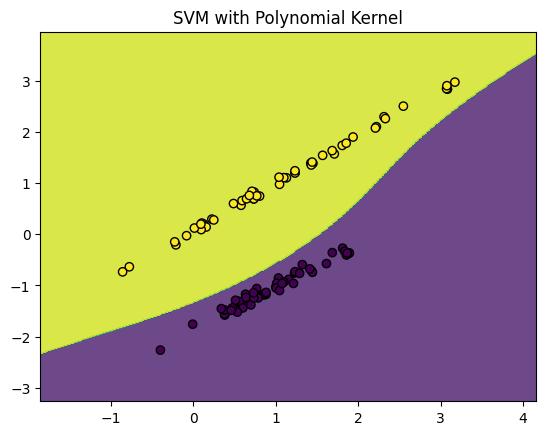

In [4]:
#4. Train SVM with Polynomial Kernel and Visualize Decision Boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create synthetic 2D data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100, random_state=42)

# Fit SVM with polynomial kernel
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot
def plot_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM with Polynomial Kernel")
    plt.show()

plot_boundary(clf, X, y)


In [5]:
#5. Train Gaussian Naïve Bayes on Breast Cancer Dataset and Evaluate Accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Gaussian NB Accuracy (Breast Cancer):", accuracy_score(y_test, y_pred))


Gaussian NB Accuracy (Breast Cancer): 0.9736842105263158


In [6]:
#6. Train Multinomial Naïve Bayes on 20 Newsgroups Dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train and evaluate
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

print("Multinomial NB Accuracy (20 Newsgroups):", accuracy_score(y_test, y_pred))


Multinomial NB Accuracy (20 Newsgroups): 0.6753315649867374


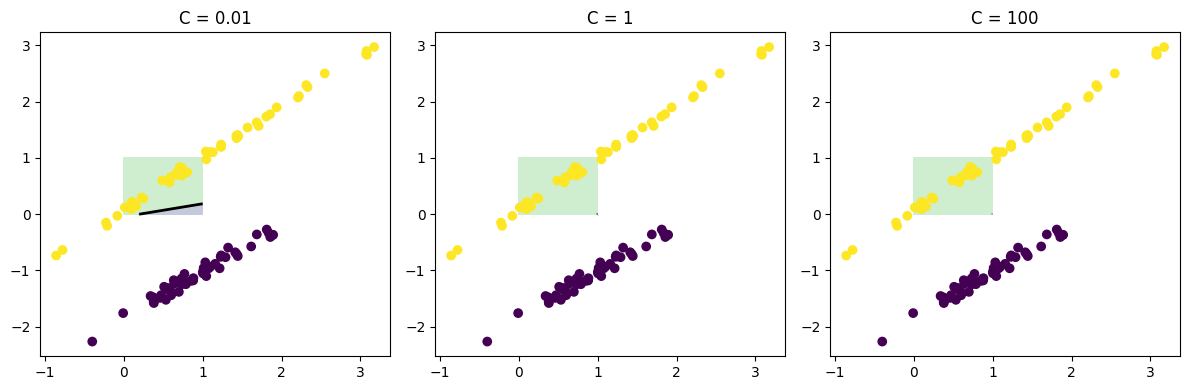

In [7]:
# Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

C_values = [0.01, 1, 100]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(1, 3, i + 1)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                         np.linspace(ylim[0], ylim[1], 30))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z > 0, alpha=0.3)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f'C = {C}')

plt.tight_layout()
plt.show()


In [8]:
# Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Binary dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X = np.where(X > 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.75


In [9]:
# Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling: {acc_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling: 0.29


In [10]:
# Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 1.0


In [11]:
# Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weight
clf_no_weight = SVC()
clf_no_weight.fit(X_train, y_train)
print("Without class_weight:\n", classification_report(y_test, clf_no_weight.predict(X_test)))

# With class weight
clf_weighted = SVC(class_weight='balanced')
clf_weighted.fit(X_train, y_train)
print("With class_weight:\n", classification_report(y_test, clf_weighted.predict(X_test)))


Without class_weight:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       275
           1       0.69      0.44      0.54        25

    accuracy                           0.94       300
   macro avg       0.82      0.71      0.75       300
weighted avg       0.93      0.94      0.93       300

With class_weight:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       275
           1       0.52      0.64      0.57        25

    accuracy                           0.92       300
   macro avg       0.74      0.79      0.76       300
weighted avg       0.93      0.92      0.92       300



In [12]:
# Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


OvR Accuracy: 0.7222222222222222
OvO Accuracy: 0.7962962962962963


In [13]:
# Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Create binary dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X = np.where(X > 0, 1, 0)  # Convert to binary features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.75


In [14]:
# Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9415204678362573


In [15]:
# Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

# Convert text to count vectors
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8443579766536965


In [16]:
# Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard GaussianNB (no smoothing parameter)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_without_smoothing = accuracy_score(y_test, y_pred)

# Add a small variance to each feature for smoothing (simulate Laplace)
class GaussianNBLaplace(GaussianNB):
    def __init__(self, var_smoothing=1e-9):
        super().__init__(var_smoothing=var_smoothing)

gnb_smooth = GaussianNBLaplace(var_smoothing=1e-8)
gnb_smooth.fit(X_train, y_train)
y_pred_smooth = gnb_smooth.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_smooth)

print(f"Accuracy without smoothing: {acc_without_smoothing:.4f}")
print(f"Accuracy with smoothing: {acc_with_smoothing:.4f}")


Accuracy without smoothing: 0.9778
Accuracy with smoothing: 0.9778


In [17]:
# Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

from sklearn.datasets import fetch_openml
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load spam dataset from OpenML (Spambase dataset)
# If no internet, replace with your own data
data = fetch_openml('spambase', version=1, as_frame=True)
X = data.data
y = data.target.astype(int)

# Note: This dataset is numeric, but let's simulate text features for demonstration:
# If you have raw email text, you would vectorize similarly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



In [18]:
# Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777


In [19]:
# Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without feature selection
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_no_fs = gnb.predict(X_test)
acc_no_fs = accuracy_score(y_test, pred_no_fs)

# With feature selection (top 10 features)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

gnb_fs = GaussianNB()
gnb_fs.fit(X_train_sel, y_train)
pred_fs = gnb_fs.predict(X_test_sel)
acc_fs = accuracy_score(y_test, pred_fs)

print(f"Accuracy without feature selection: {acc_no_fs:.4f}")
print(f"Accuracy with feature selection: {acc_fs:.4f}")


Accuracy without feature selection: 0.9415
Accuracy with feature selection: 0.9591


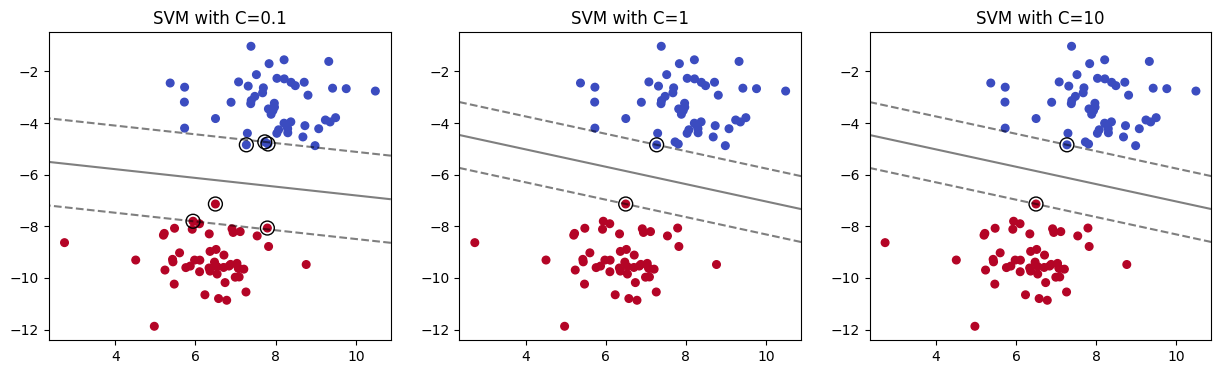

In [20]:
# Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load a simple dataset for visualization
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

def plot_svc_decision_boundary(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for ax, C in zip(axs, [0.1, 1, 10]):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    plot_svc_decision_boundary(svm, ax)
    ax.set_title(f'SVM with C={C}')

plt.show()


In [21]:
# Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling: {acc_scaled:.4f}")


Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


In [22]:
# Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Test accuracy: 0.9777777777777777


In [23]:
# Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate imbalanced dataset
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weights
svm_no_weights = SVC()
svm_no_weights.fit(X_train, y_train)
y_pred_no_weights = svm_no_weights.predict(X_test)
acc_no_weights = accuracy_score(y_test, y_pred_no_weights)

# With class weights balanced
svm_weights = SVC(class_weight='balanced')
svm_weights.fit(X_train, y_train)
y_pred_weights = svm_weights.predict(X_test)
acc_weights = accuracy_score(y_test, y_pred_weights)

print(f"Accuracy without class weighting: {acc_no_weights:.4f}")
print(f"Accuracy with class weighting: {acc_weights:.4f}")

print("\nClassification report with class weighting:")
print(classification_report(y_test, y_pred_weights))


Accuracy without class weighting: 0.9100
Accuracy with class weighting: 0.9000

Classification report with class weighting:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       270
           1       0.50      0.57      0.53        30

    accuracy                           0.90       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.91      0.90      0.90       300



In [25]:
# Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777


In [26]:
# Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without feature selection
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_no_fs = gnb.predict(X_test)
acc_no_fs = accuracy_score(y_test, pred_no_fs)

# With feature selection (top 10 features)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

gnb_fs = GaussianNB()
gnb_fs.fit(X_train_sel, y_train)
pred_fs = gnb_fs.predict(X_test_sel)
acc_fs = accuracy_score(y_test, pred_fs)

print(f"Accuracy without feature selection: {acc_no_fs:.4f}")
print(f"Accuracy with feature selection: {acc_fs:.4f}")


Accuracy without feature selection: 0.9415
Accuracy with feature selection: 0.9591


In [27]:
# Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# OvR strategy (default for SVC with multi-class)
svm_ovr = SVC(decision_function_shape='ovr')
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# OvO strategy
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OvR Accuracy: {acc_ovr:.4f}")
print(f"OvO Accuracy: {acc_ovo:.4f}")


OvR Accuracy: 0.7593
OvO Accuracy: 0.7593


In [28]:
# Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Accuracy with {kernel} kernel: {accuracy_score(y_test, y_pred):.4f}")


Accuracy with linear kernel: 0.9649
Accuracy with poly kernel: 0.9415
Accuracy with rbf kernel: 0.9357


In [29]:
# Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)

skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Average accuracy with Stratified K-Fold CV: {np.mean(accuracies):.4f}")



Average accuracy with Stratified K-Fold CV: 0.9667


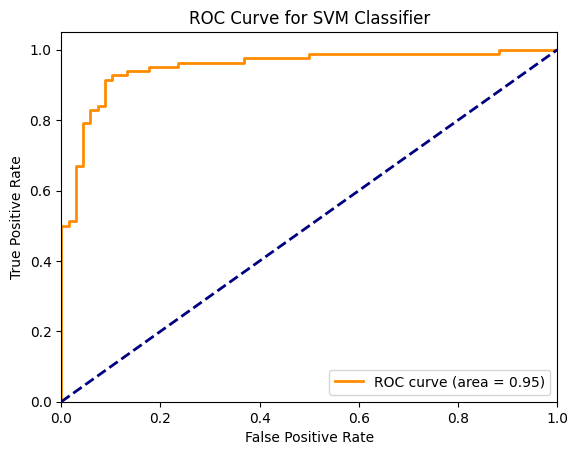

In [30]:
# Write a Python program to visualize the ROC Curve for an SVM Classifier on a binary classification dataset

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

X, y = make_classification(n_samples=500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_score = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()


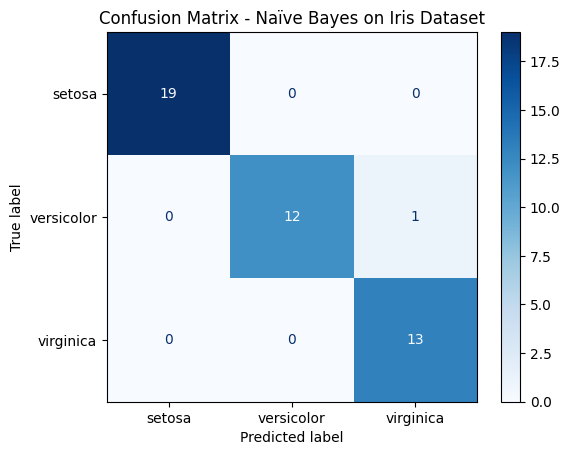

In [31]:
# Write a Python program to visualize the Confusion Matrix for a Naïve Bayes classifier on the Iris dataset

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_iris().target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naïve Bayes on Iris Dataset")
plt.show()


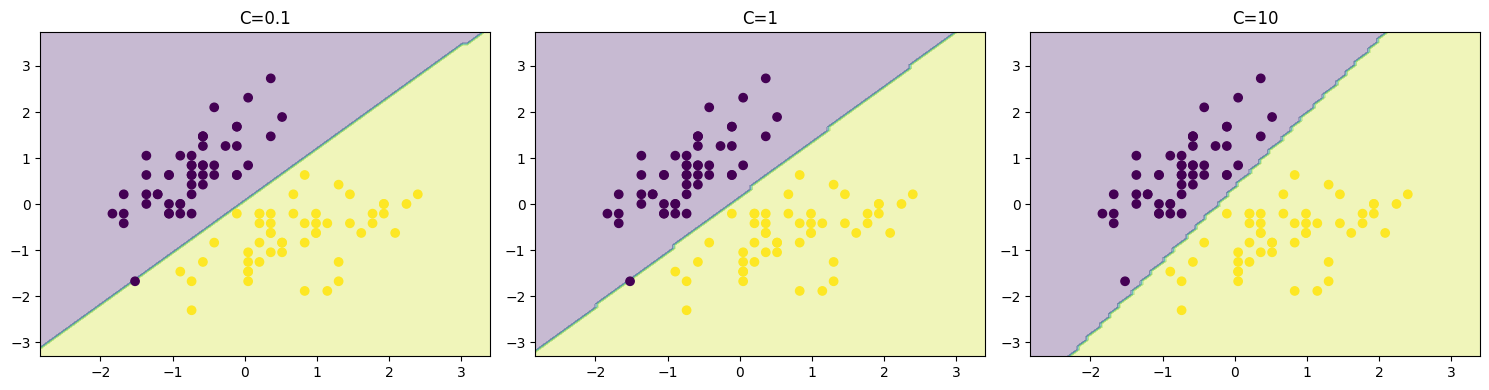

In [32]:
#Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset (only two classes for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
i = y < 2  # filter two classes for binary classification
X = X[i]
y = y[i]

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train and plot for different C values
C_values = [0.1, 1, 10]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f'C={C}')
plt.tight_layout()
plt.show()


In [33]:
#Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1)
X_df = pd.DataFrame(X, columns=[f"X{i}" for i in range(1, 6)])

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif_data)


  Feature       VIF
0      X1  1.026895
1      X2  1.016981
2      X3  1.009640
3      X4  1.040169
4      X5  1.010944


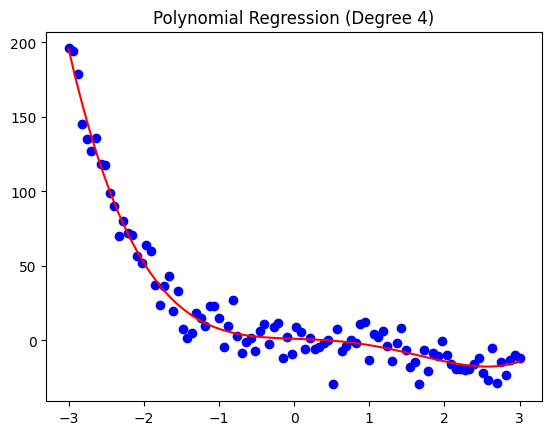

In [34]:
#Polynomial regression (degree 4)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**4 - 4*X**3 + X**2 + np.random.randn(100, 1)*10

# Fit polynomial regression
model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model.fit(X, y)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()




In [35]:
#Pipeline with data standardization and multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=3, noise=10)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)
print("R-squared Score:", pipeline.score(X, y))


R-squared Score: 0.9928410665540517


In [36]:
# Multiple Linear Regression on synthetic dataset with 5 features
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=5, noise=15)
model = LinearRegression()
model.fit(X, y)
print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)



R-squared Score: 0.986980128470321
Coefficients: [10.02589056 77.90170426  6.98389883 90.2695806  59.87650638]


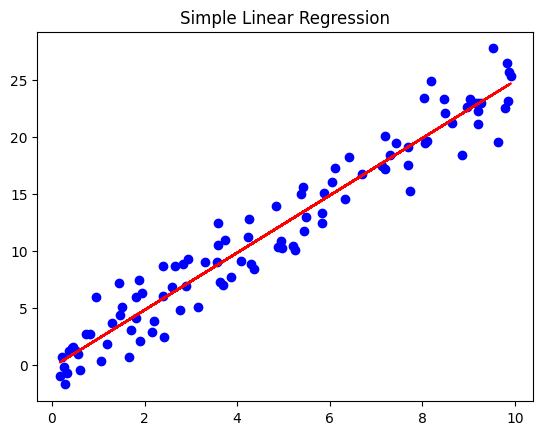

In [37]:
#Simple Linear Regression with visualization
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Simple Linear Regression")
plt.show()


In [38]:
# Multiple Linear Regression with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=10)
model = LinearRegression()
model.fit(X, y)
print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)

R-squared Score: 0.9902062827476844
Coefficients: [64.59882034 76.27900664 15.97206343]
